<a href="https://colab.research.google.com/github/sankardevisharath/amex-default-prediction/blob/master/notebooks/final_model/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir

files = listdir('/content/drive/MyDrive/amex-default-prediction/data/raw/')

In [ ]:
import gc 

import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
cat_cols = ['D_63', 'D_64','B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']
TRAIN_LABELS_PATH = '/content/train_labels.csv'

In [ ]:
!unzip /content/drive/MyDrive/amex-default-prediction/data/amex-default-prediction.zip \
 train_labels.csv

Archive:  /content/drive/MyDrive/amex-default-prediction/data/amex-default-prediction.zip
replace train_labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_labels.csv        


In [ ]:
train_labels = pd.read_csv(TRAIN_LABELS_PATH)

In [ ]:
def append_label(source_df):
  return pd.merge(left=source_df, right=train_labels, how='inner')

In [ ]:
flag = True
X = pd.DataFrame()
Y = pd.DataFrame()

for f in files:
  print(f)
  df_tmp = pd.read_parquet('/content/drive/MyDrive/amex-default-prediction/data/raw/' + f)
  df_tmp = append_label(df_tmp)


  if(flag):
     enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
     df_tmp[['D_63', 'D_64']]=enc.fit(df_tmp[['D_63', 'D_64']])
     flag = False

  df_tmp[['D_63', 'D_64']]=enc.transform(df_tmp[['D_63', 'D_64']])
  df_tmp.fillna(0, inplace=True)

  X= X.append(df_tmp.loc[:, ~df_tmp.columns.isin(['customer_ID', 'S_2', 'target'])])

  Y = Y.append(df_tmp.loc[:, df_tmp.columns == 'target'])

  
  del df_tmp
  gc.collect()


data_2017-04.parquet
data_2017-05.parquet
data_2017-06.parquet
data_2017-03.parquet
data_2017-07.parquet
data_2017-08.parquet
data_2017-09.parquet
data_2017-10.parquet
data_2017-11.parquet
data_2017-12.parquet
data_2018-01.parquet
data_2018-02.parquet
data_2018-03.parquet


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
gc.collect()

44

In [ ]:
del X, Y

In [ ]:
gc.collect()

44

In [ ]:
clf = SGDClassifier(verbose=1000, early_stopping=True, validation_fraction=0.1)

In [ ]:
clf.fit(X_train, y_train.values.ravel())

-- Epoch 1
Norm: 4.34, NNZs: 188, Bias: -0.477308, T: 3982644, Avg. loss: 3.017504
Total training time: 4.97 seconds.
-- Epoch 2
Norm: 3.98, NNZs: 188, Bias: -0.113929, T: 7965288, Avg. loss: 0.437642
Total training time: 12.25 seconds.
-- Epoch 3
Norm: 3.80, NNZs: 188, Bias: -0.097684, T: 11947932, Avg. loss: 0.394644
Total training time: 19.56 seconds.
-- Epoch 4
Norm: 3.81, NNZs: 188, Bias: -0.085492, T: 15930576, Avg. loss: 0.331363
Total training time: 26.92 seconds.
-- Epoch 5
Norm: 4.08, NNZs: 188, Bias: -0.052710, T: 19913220, Avg. loss: 0.325656
Total training time: 34.34 seconds.
-- Epoch 6
Norm: 3.76, NNZs: 188, Bias: -0.037451, T: 23895864, Avg. loss: 0.313857
Total training time: 41.79 seconds.
Convergence after 6 epochs took 44.07 seconds


SGDClassifier(early_stopping=True, verbose=1000)

In [ ]:
clf.score(X_test, y_test)

0.872350945637269

In [ ]:
clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': True,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 1000,
 'warm_start': False}

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
tn, fp, fn, tp

(757005, 73946, 67271, 208069)

In [ ]:
f1_score(y_test, y_pred)

0.7466300652187564

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9184    0.9110    0.9147    830951
           1     0.7378    0.7557    0.7466    275340

    accuracy                         0.8724   1106291
   macro avg     0.8281    0.8333    0.8307   1106291
weighted avg     0.8734    0.8724    0.8729   1106291



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


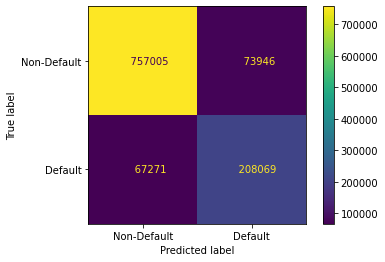

In [ ]:
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Non-Default', 'Default'], values_format='10d')  
plt.show()